<h1 align='center'>Machine Learning Lab</h1>
<h3 align='center'>Lab 03</h3>

## Exercise 2: Linear Regression with Gradient Descent

### Part A: (Datasets)

#### Importing Packages

In [1]:
import pandas as pd                  #Importing Pandas
import numpy as np                   #Importing Numpy
import matplotlib.pyplot as plt      #Importing Matplotlib

#### Reading Wine Quality Dataset

In [2]:
wine_quality = pd.read_csv('winequality-red.csv',delimiter=';')
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Reading Airfare and Demand Dataset

In [3]:
airfare_demand = pd.read_fwf('airq402.data',header=None)
airfare_demand.columns = ['City1','City2','Average Fare1','Distance','Average weekly passengers',
                          'market leading airline','market share','Average fare2','Low price airline',
                          'market share','price']
airfare_demand.head()

,City1,City2,Average Fare1,Distance,Average weekly passengers,market leading airline,market share,Average fare2,Low price airline,market share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


#### Reading Parkison Dataset

In [4]:
parkison = pd.read_csv('parkinsons_updrs.data')
parkison.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


#### Convert any non-numeric values to numeric values. For example you can replace a country name with an integer value or more appropriately use hot-one encoding. [Hint: use pandas.get_dummies].Please explain your solution.

In [5]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
airfare_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   City1                      1000 non-null   object 
 1   City2                      1000 non-null   object 
 2   Average Fare1              1000 non-null   float64
 3   Distance                   1000 non-null   int64  
 4   Average weekly passengers  1000 non-null   float64
 5   market leading airline     1000 non-null   object 
 6   market share               1000 non-null   float64
 7   Average fare2              1000 non-null   float64
 8   Low price airline          1000 non-null   object 
 9   market share               1000 non-null   float64
 10  price                      1000 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


In [7]:
#Converting Non-Numeric Columns to to numeric Columns using Hot one encoding scheme
airfare_demand_encoded = pd.get_dummies(airfare_demand,columns=['City1','City2','market leading airline','Low price airline'])
airfare_demand_encoded.head()

,Average Fare1,Distance,Average weekly passengers,market share,Average fare2,market share,price,City1_ABQ,City1_ACY,City1_ALB,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [8]:
parkison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

#### If required drop out the rows with missing values or NA. In next lectures we will handle sparse data, which will allow us to use records with missing values.

In [9]:
wine_quality.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
airfare_demand_encoded.isnull().sum()

Average Fare1                0
Distance                     0
Average weekly passengers    0
market share                 0
Average fare2                0
                            ..
Low price airline_TZ         0
Low price airline_UA         0
Low price airline_US         0
Low price airline_WN         0
Low price airline_YX         0
Length: 217, dtype: int64

In [11]:
parkison.isnull().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

#### Split the dataset into 80% Train set and 20% Test set.

##### Function to Split any Dataframe into Training Set and Test Set

In [12]:
def split_dataset(dataset,label):
    #Creating X matrix by removing the label/Target column
    X = dataset.drop(label,axis=1)
    #Creating Y vector which include only the Label/Target Column
    Y = dataset[label].to_numpy()

    #Adding a Bias Column in the X Matrix
    X = np.append(np.ones(shape=(len(X),1)),X,axis=1)
    
    #Calculating number of rows to be copied in the Training Set according to 80:20 ratio
    total_training_rows = int(len(X)*0.8)
    
    #Splitting the Dataset into Training set and Test Set based on calculated rows
    X_train , Y_train = X[:total_training_rows,:] , Y[:total_training_rows].reshape(-1,1)
    X_test , Y_test = X[total_training_rows:,:] , Y[total_training_rows:].reshape(-1,1)
    
    return X_train,X_test,Y_train,Y_test

##### Splitting Wine Quality Dataset

In [13]:
wine_Xtrain , wine_Xtest , wine_Ytrain , wine_Ytest = split_dataset(wine_quality,'quality')

##### Splitting Airfare Demand Dataset

In [14]:
airfare_Xtrain , airfare_Xtest , airfare_Ytrain , airfare_Ytest = split_dataset(airfare_demand_encoded,'price')

##### Splitting Parkison Dataset

In [15]:
parkison_Xtrain , parkison_Xtest , parkison_Ytrain , parkison_Ytest = split_dataset(parkison,'total_UPDRS')

### Part B: Linear Regression with Real-World Data

In [16]:
#Initializing arrays to store loss difference and RMSE values in different number of Iterations
loss_difference_values = np.array([])
rmse_values = np.array([])

#### Function to Calculate Loss Between Actual Y and Predicted Y

In [17]:
def loss_function(X,Y,B):
    # L(B) = summation((y-ypred)^2)
    return np.sum(np.square(np.subtract(Y,X @ B)))

#### Function to Calculate the Loss Difference based on Old Beta Values and New Beta Values

In [18]:
def loss_difference(X,Y,B_old,B_new):
    # |L(B_old) - L(B_new)|
    return np.abs(loss_function(X,Y,B_old) - loss_function(X,Y,B_new))

#### Function to Calculate the RMSE Loss between Actual Y and Predicted Y

In [19]:
def rmse(X,Y,B):
    # RMSE = square_root(summation((y-ypred)^2)/N)
    return np.sqrt(np.sum(np.square(np.subtract(Y , X @ B)))/len(X))

#### Function which returns the gradient of Loss function

In [20]:
def dL(X,Y,B):
    # Derivation of Loss = -2 * X^t * (y - ypred)
    return -2 * (X.T @ (Y - X @ B))

#### Function to Minimize Gradient Descent based on Total Iterations and Learning Rate

In [21]:
def minimize_GD(X,Y,X_test,Y_test,imax,mu):
    #Using global arrays to store loss difference and rmse values for different Iterations
    global loss_difference_values , rmse_values
    
    #Emptying both Loss difference and RMSE arrays
    loss_difference_values , rmse_values = np.array([]) , np.array([])
    
    #Initializing beta with Zeros
    beta = np.zeros(shape=(len(X[0]),1))
    for i in range(imax):
        #Calculating new Beta values from previous beta values and gradient descent direction
        #Beta = Beta - learning_rate * gradient Descent based on Beta
        beta_ = beta - mu * dL(X,Y,beta)
        
        #Appending Loss difference between between previous and new Beta
        loss_difference_values = np.append(loss_difference_values,loss_difference(X,Y,beta,beta_))
        
        #Appending RMSE loss between actual Y and Predicted Y
        rmse_values = np.append(rmse_values,rmse(X_test,Y_test,beta_))
        
        #Copying new Beta value to old Beta value for Further Calculation
        beta = np.copy(beta_)
    return beta_

#### Function to Plot Loss Difference and RMSE Loss

In [22]:
def plot_loss(xvalues , loss_difference , rmse ,title_graph1 ,title_graph2 ,xlabel_graph1 ,xlabel_graph2 ,ylabel_graph1,ylabel_graph2):
    #Plotting Loss Difference Graph
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(121)
    ax.plot(xvalues,loss_difference)
    ax.set_title(title_graph1)
    ax.set_xlabel(xlabel_graph1)
    ax.set_ylabel(ylabel_graph1)
    
    #Plotting RMSE Loss
    ax1 = fig.add_subplot(122)
    ax1.plot(xvalues,rmse)
    ax1.set_title(title_graph2)
    ax1.set_xlabel(xlabel_graph2)
    ax1.set_ylabel(ylabel_graph2)

#### Applying Different Iteration and Different mu values for the Optimum values

In [23]:
imax_d = [100,500,1000]
mu_wine = [0.0000001,0.00000001,0.000000001]
mu_parkison = [0.00000001,0.000000001,0.0000000001]
mu_airfare = [0.000000000001,0.0000000000001,0.00000000000001]

#### Applying Different Iterations on Wine Quality Dataset with mu=0.0000001

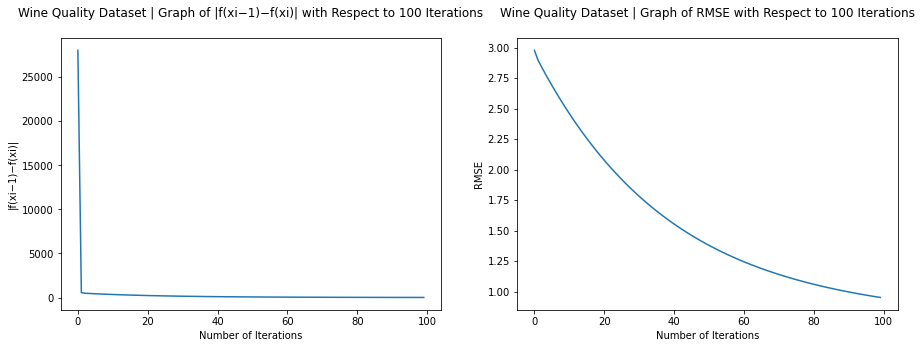

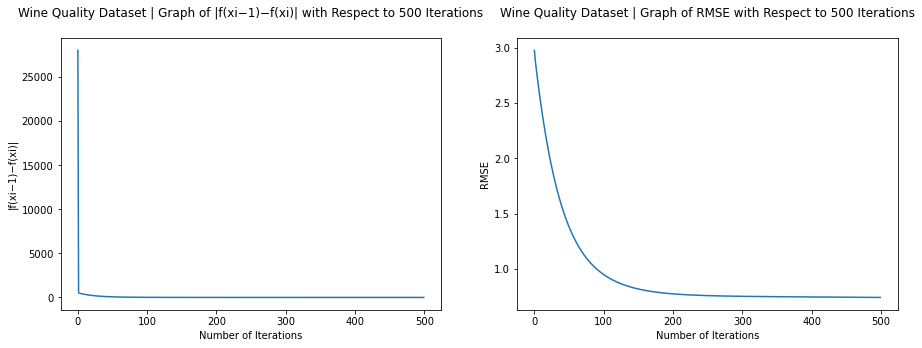

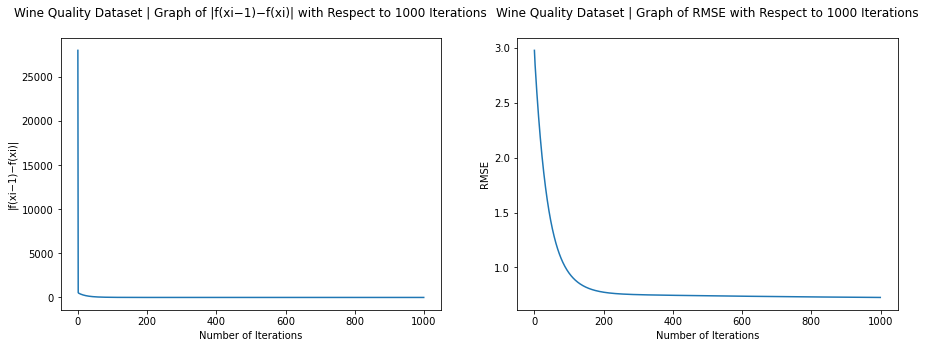

In [24]:
for i in imax_d:
    #Calculating new beta using Gradient Descent using mu = 0.0000001
    beta = minimize_GD(wine_Xtrain,wine_Ytrain,wine_Xtest,wine_Ytest,i,0.0000001)
    
    #Plotting the Loss and RMSE with different Iterations
    plot_loss([j for j in range(i)],loss_difference_values,rmse_values,
              'Wine Quality Dataset | Graph of |f(xi−1)−f(xi)| with Respect to {} Iterations\n'.format(i),
              'Wine Quality Dataset | Graph of RMSE with Respect to {} Iterations\n'.format(i),
              'Number of Iterations','Number of Iterations','|f(xi−1)−f(xi)|','RMSE')

#### Applying Different Iterations on Parkison Dataset with mu=0.00000001

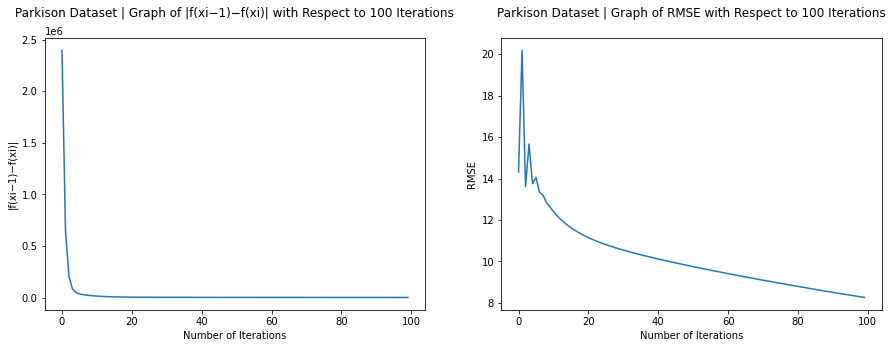

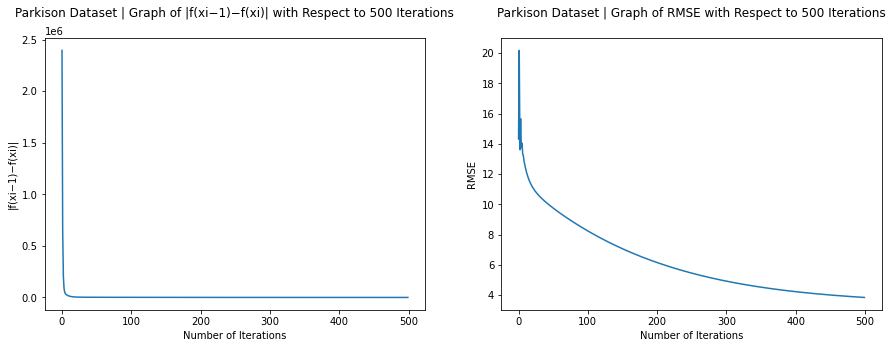

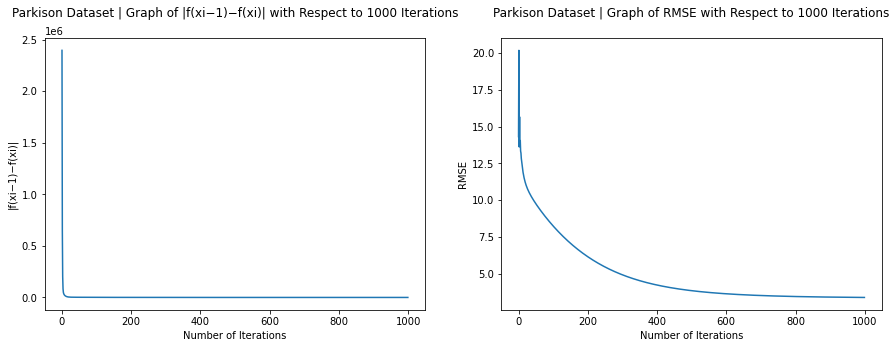

In [25]:
for i in imax_d:
    #Calculating new beta using Gradient Descent using mu = 0.00000001
    beta = minimize_GD(parkison_Xtrain,parkison_Ytrain,parkison_Xtest,parkison_Ytest,i,0.00000001)
    
    #Plotting the Loss and RMSE with different Iterations
    plot_loss([j for j in range(i)],loss_difference_values,rmse_values,
              'Parkison Dataset | Graph of |f(xi−1)−f(xi)| with Respect to {} Iterations\n'.format(i),
              'Parkison Dataset | Graph of RMSE with Respect to {} Iterations\n'.format(i),
              'Number of Iterations','Number of Iterations','|f(xi−1)−f(xi)|','RMSE')

#### Applying Different Iterations on Airfare Demand Dataset with mu=0.000000000001

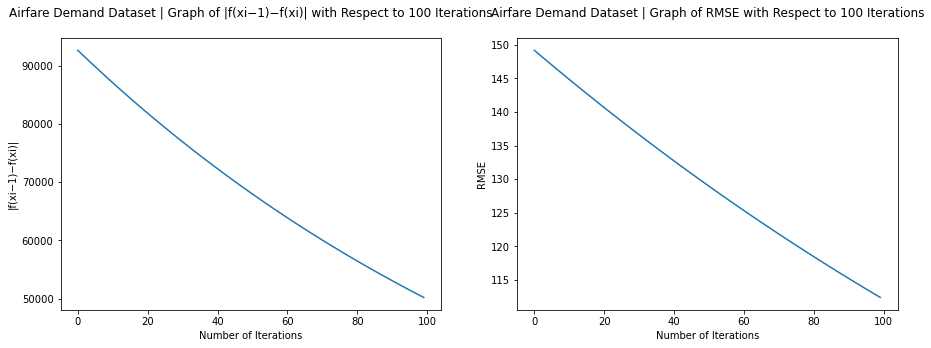

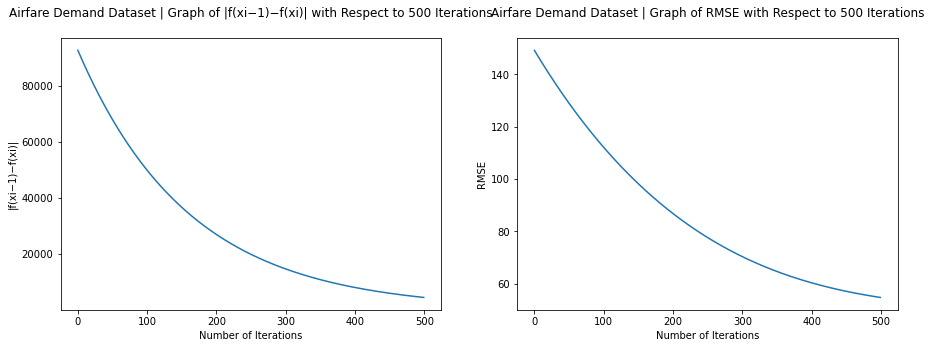

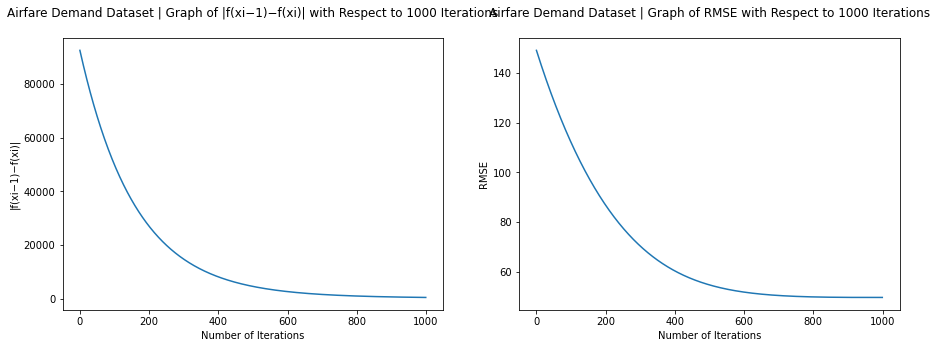

In [26]:
for i in imax_d:
    #Calculating new beta using Gradient Descent using mu = 0.000000000001
    beta = minimize_GD(airfare_Xtrain,airfare_Ytrain,airfare_Xtest,airfare_Ytest,i,0.000000000001)
    
    #Plotting the Loss and RMSE with different Iterations
    plot_loss([j for j in range(i)],loss_difference_values,rmse_values,
              'Airfare Demand Dataset | Graph of |f(xi−1)−f(xi)| with Respect to {} Iterations\n'.format(i),
              'Airfare Demand Dataset | Graph of RMSE with Respect to {} Iterations\n'.format(i),
              'Number of Iterations','Number of Iterations','|f(xi−1)−f(xi)|','RMSE')

#### Applying Different mu values on Wine Quality Dataset with imax = 1000

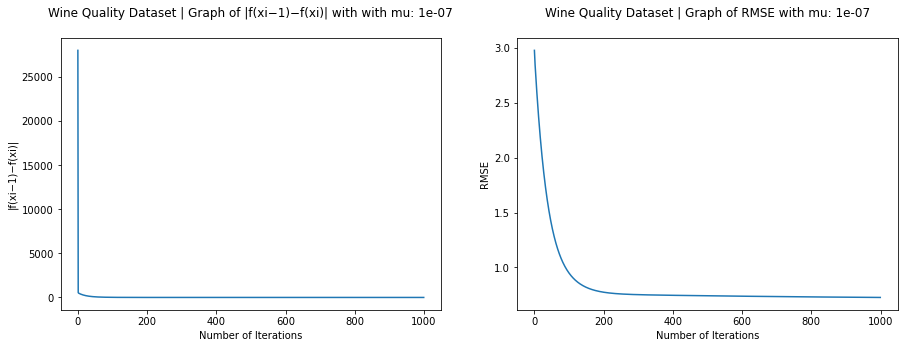

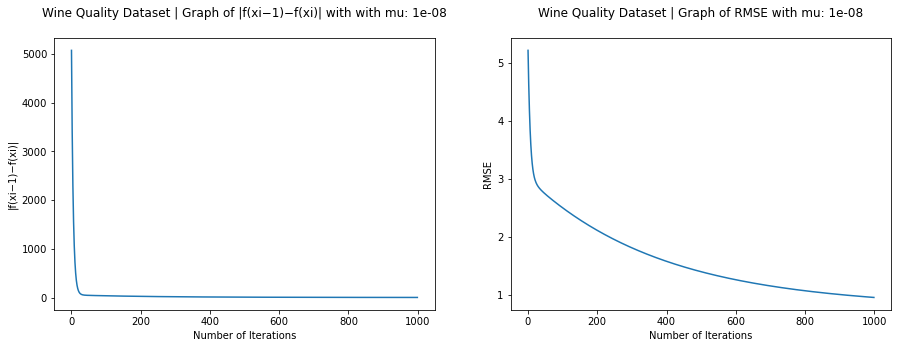

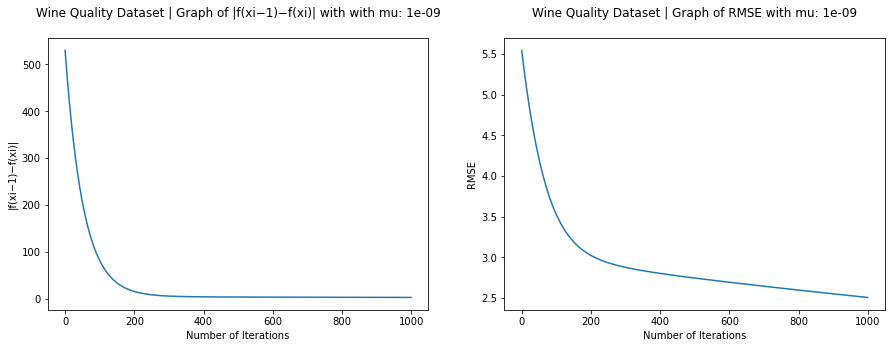

In [27]:
for mu in mu_wine:
    #Calculating new beta using Gradient Descent using imax = 1000
    beta = minimize_GD(wine_Xtrain,wine_Ytrain,wine_Xtest,wine_Ytest,1000,mu)
    
    #Plotting the Loss and RMSE with different mu values
    plot_loss([i for i in range(1000)],loss_difference_values,rmse_values,
              'Wine Quality Dataset | Graph of |f(xi−1)−f(xi)| with with mu: {}\n'.format(mu),
              'Wine Quality Dataset | Graph of RMSE with mu: {}\n'.format(mu),
              'Number of Iterations','Number of Iterations','|f(xi−1)−f(xi)|','RMSE')

#### Applying Different mu values on Parkison Dataset with imax = 1000

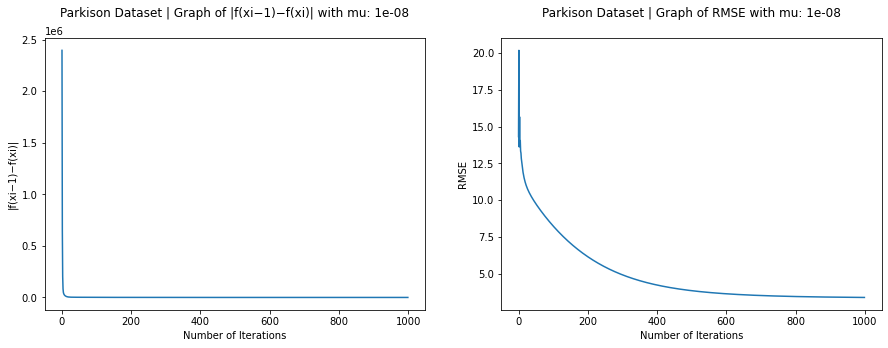

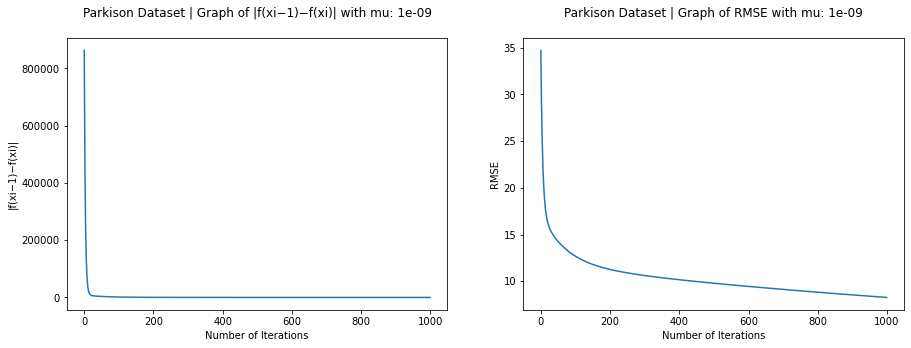

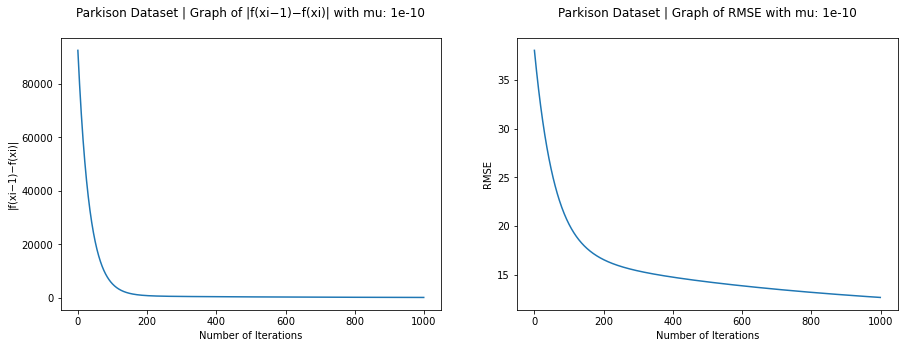

In [28]:
for mu in mu_parkison:
    #Calculating new beta using Gradient Descent using imax = 1000
    beta = minimize_GD(parkison_Xtrain,parkison_Ytrain,parkison_Xtest,parkison_Ytest,1000,mu)
    
    #Plotting the Loss and RMSE with different mu values
    plot_loss([i for i in range(1000)],loss_difference_values,rmse_values,
              'Parkison Dataset | Graph of |f(xi−1)−f(xi)| with mu: {}\n'.format(mu),
              'Parkison Dataset | Graph of RMSE with mu: {}\n'.format(mu),
              'Number of Iterations','Number of Iterations','|f(xi−1)−f(xi)|','RMSE')

#### Applying Different mu values on Airfare Demand Dataset with imax = 1000

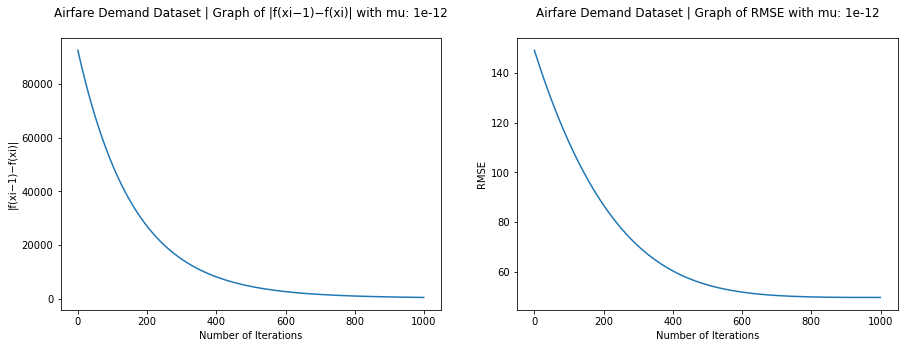

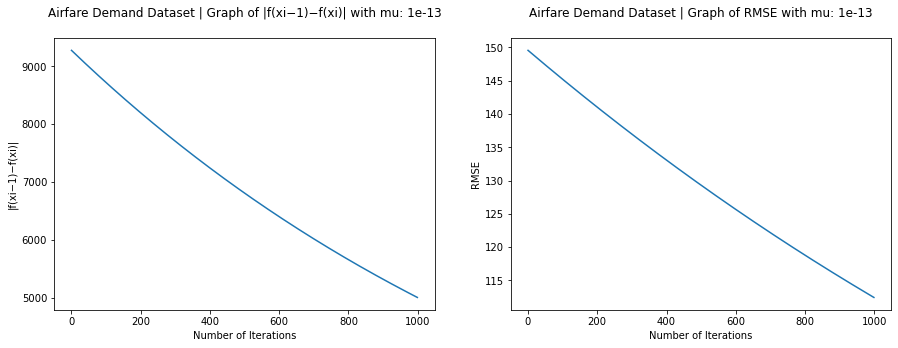

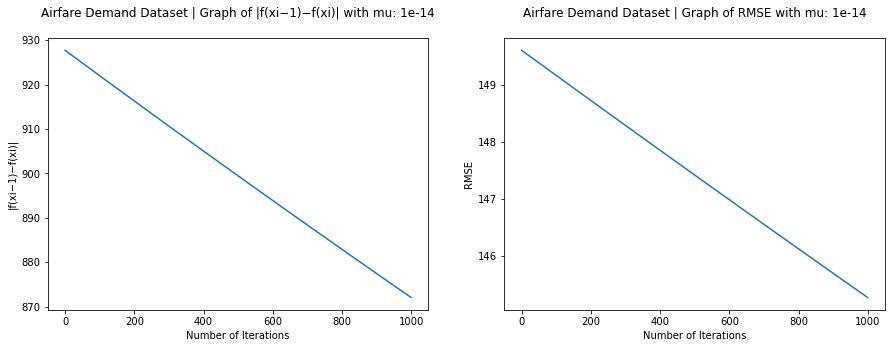

In [29]:
for mu in mu_airfare:
    #Calculating new beta using Gradient Descent using imax = 1000
    beta = minimize_GD(airfare_Xtrain,airfare_Ytrain,airfare_Xtest,airfare_Ytest,1000,mu)
    
    #Plotting the Loss and RMSE with different mu values
    plot_loss([i for i in range(1000)],loss_difference_values,rmse_values,
              'Airfare Demand Dataset | Graph of |f(xi−1)−f(xi)| with mu: {}\n'.format(mu),
              'Airfare Demand Dataset | Graph of RMSE with mu: {}\n'.format(mu),
              'Number of Iterations','Number of Iterations','|f(xi−1)−f(xi)|','RMSE')

## Exercise 3: Steplength Control for Gradient Descent

#### Function to Plot Loss Difference and RMSE

In [30]:
def plot_stepsize_iteration(xvalues1, xvalues2 , loss_difference , rmse ,title_graph1 ,title_graph2 ,
                            xlabel_graph1 ,xlabel_graph2 ,ylabel_graph1,ylabel_graph2):
    #Plotting Total Iteration vs Loss Difference Graph
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(121)
    ax.plot(xvalues1,loss_difference)
    ax.set_title(title_graph1)
    ax.set_xlabel(xlabel_graph1)
    ax.set_ylabel(ylabel_graph1)
    
    #Plotting different MU values vs RMSE Loss
    ax1 = fig.add_subplot(122)
    ax1.plot(xvalues2,rmse)
    ax1.set_title(title_graph2)
    ax1.set_xlabel(xlabel_graph2)
    ax1.set_ylabel(ylabel_graph2)

#### Function to calculate optimum learning rate using Backtracking Algorithm

In [31]:
def stepsize_backtracking(X,Y,B):
    mu = 1        #Starting Learning rate value
    alpha = 0.1   #Value for Alpha
    beta = 0.5    #Value for Beta
    
    #Iterate until the following condition is meet:
    #f (x) − f(x − µ∇f (x)) < αµ∇f (x)T ∇f (x)
    while((loss_function(X,Y,B) - loss_function(X,Y,B+(mu*-1*dL(X,Y,B))) < (alpha * mu * (dL(X,Y,B).T @ dL(X,Y,B))))):
        mu = mu * beta
    return mu

#### Function to Minimize Gradient Descent using Backtracking algorithm

In [32]:
def minimize_GD_backtracking(X,Y,X_test,Y_test,imax):
    #Creating and Initializing arrays to store loss difference and RMSE
    global loss_difference_values , rmse_values
    loss_difference_values , rmse_values = np.array([]) , np.array([])
    
    #Initializing beta with 0s
    beta = np.zeros(shape=(len(X[0]),1))
    for i in range(imax):
        #Calculating new Beta using Gradient Descent and backtracking algorithm
        beta_ = beta - stepsize_backtracking(X,Y,beta) * dL(X,Y,beta)
        
        #Calculating Loss difference between old Beta and New Beta
        loss_difference_values = np.append(loss_difference_values,loss_difference(X,Y,beta,beta_))
        
        #Calculating RMSE loss based on new Beta
        rmse_values = np.append(rmse_values,rmse(X_test,Y_test,beta_))
        
        #Copying New beta to Old Beta for Next Iteration
        beta = np.copy(beta_)
    return beta_

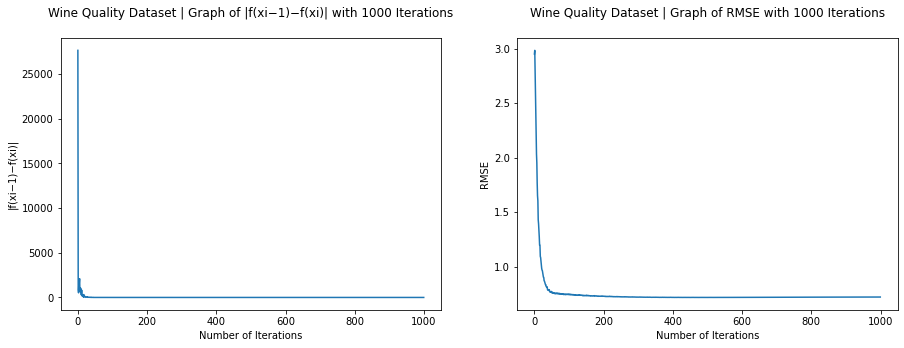

In [33]:
#Calculating new beta using Gradient Descent using imax = 1000
beta = minimize_GD_backtracking(wine_Xtrain,wine_Ytrain,wine_Xtest,wine_Ytest,1000)
    
#Plotting the Loss and RMSE with different mu values
plot_stepsize_iteration([i for i in range(1000)],[j for j in range(1000)],loss_difference_values,rmse_values,
          'Wine Quality Dataset | Graph of |f(xi−1)−f(xi)| with 1000 Iterations\n'.format(i),
          'Wine Quality Dataset | Graph of RMSE with 1000 Iterations\n'.format(i),
          'Number of Iterations','Number of Iterations','|f(xi−1)−f(xi)|','RMSE')

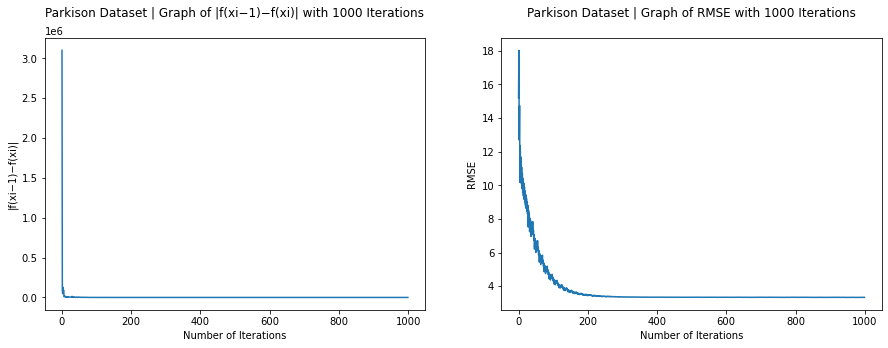

In [34]:
#Calculating new beta using Gradient Descent using imax = 1000
beta = minimize_GD_backtracking(parkison_Xtrain,parkison_Ytrain,parkison_Xtest,parkison_Ytest,1000)
    
#Plotting the Loss and RMSE with different mu values
plot_stepsize_iteration([i for i in range(1000)],[j for j in range(1000)],loss_difference_values,rmse_values,
          'Parkison Dataset | Graph of |f(xi−1)−f(xi)| with 1000 Iterations\n'.format(i),
          'Parkison Dataset | Graph of RMSE with 1000 Iterations\n'.format(i),
          'Number of Iterations','Number of Iterations','|f(xi−1)−f(xi)|','RMSE')

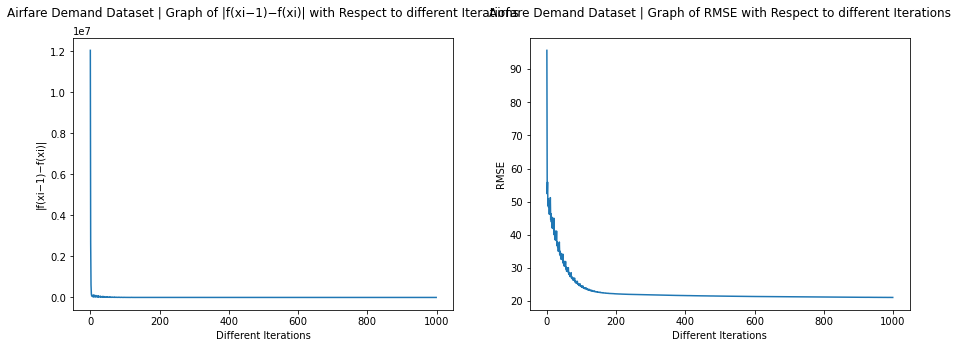

In [35]:
#Calculating new beta using Gradient Descent using imax = 1000
beta = minimize_GD_backtracking(airfare_Xtrain,airfare_Ytrain,airfare_Xtest,airfare_Ytest,1000)
    
#Plotting the Loss and RMSE with different mu values
plot_stepsize_iteration([i for i in range(1000)],[j for j in range(1000)],loss_difference_values,rmse_values,
          'Airfare Demand Dataset | Graph of |f(xi−1)−f(xi)| with Respect to different Iterations\n'.format(i),
          'Airfare Demand Dataset | Graph of RMSE with Respect to different Iterations\n'.format(i),
          'Different Iterations','Different Iterations','|f(xi−1)−f(xi)|','RMSE')

#### Function to calculate optimum learning rate using Bold Driver Algorithm

In [36]:
def steplength_bolddriver(X,Y,B,alpha_old,alpha_plus,alpha_minus):
    #Increasing alpha value using alpha+
    alpha = alpha_old*alpha_plus
    
    #Iterating until following condition is meet:
    #f(x) − f(x + µd) ≤ 0
    while(loss_function(X,Y,B) - loss_function(X,Y,B - (alpha * dL(X,Y,B))) <= 0):
        #Slowly Increasing alpha using alpha-
        alpha = alpha * alpha_minus
    return alpha

#### Function to Minimize Gradient Descent using Bold Driver algorithm

In [37]:
def minimize_GD_bolddriver(X,Y,X_test,Y_test,imax):
    #Creating and Initializing arrays to store loss difference and RMSE
    global loss_difference_values , rmse_values
    loss_difference_values , rmse_values = np.array([]) , np.array([])
    
    #Initializing beta with 0s
    theta = np.zeros(shape=(len(X[0]),1))
    alpha = 1
    for i in range(imax):
        #Calculating alpha based bold driver algorithm
        alpha = steplength_bolddriver(X,Y,theta,alpha,1.1,0.5)
        
        #Calculating new Beta using Gradient Descent and backtracking algorithm
        theta_ = theta - alpha * dL(X,Y,theta)
        
        #Calculating Loss difference between old Beta and New Beta
        loss_difference_values = np.append(loss_difference_values,loss_difference(X,Y,theta,theta_))
        
        #Calculating RMSE loss based on new Beta
        rmse_values = np.append(rmse_values,rmse(X_test,Y_test,theta_))
        
        #Copying New beta to Old Beta for Next Iteration
        theta = np.copy(theta_)
    return theta_

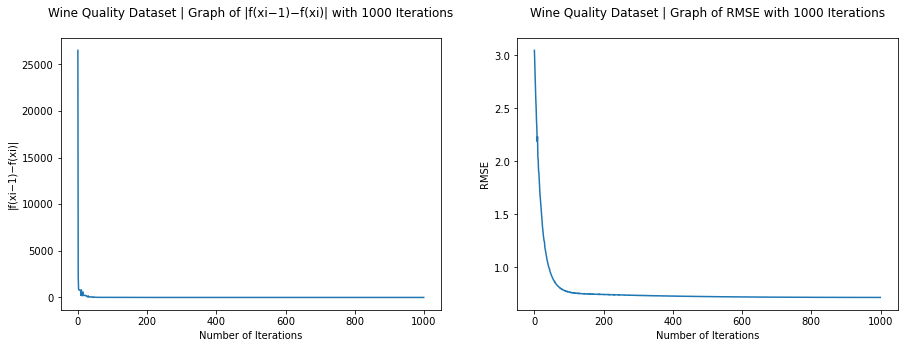

In [38]:
#Calculating new beta using Gradient Descent using imax = 1000
beta = minimize_GD_bolddriver(wine_Xtrain,wine_Ytrain,wine_Xtest,wine_Ytest,1000)
    
#Plotting the Loss and RMSE with different mu values
plot_stepsize_iteration([i for i in range(1000)],[j for j in range(1000)],loss_difference_values,rmse_values,
          'Wine Quality Dataset | Graph of |f(xi−1)−f(xi)| with 1000 Iterations\n'.format(i),
          'Wine Quality Dataset | Graph of RMSE with 1000 Iterations\n'.format(i),
          'Number of Iterations','Number of Iterations','|f(xi−1)−f(xi)|','RMSE')

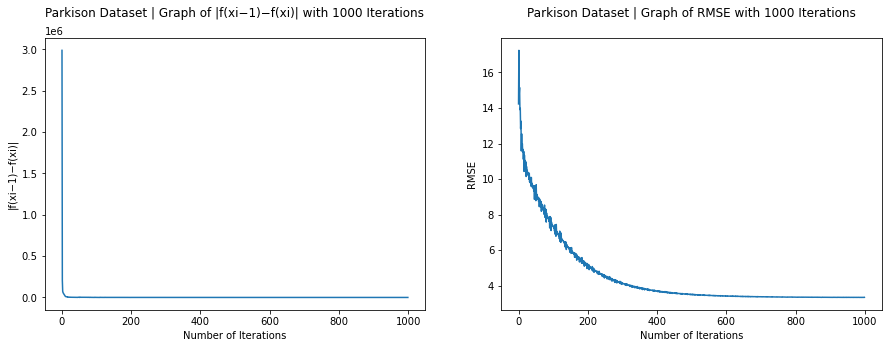

In [39]:
#Calculating new beta using Gradient Descent using imax = 1000
beta = minimize_GD_bolddriver(parkison_Xtrain,parkison_Ytrain,parkison_Xtest,parkison_Ytest,1000)
    
#Plotting the Loss and RMSE with different mu values
plot_stepsize_iteration([i for i in range(1000)],[j for j in range(1000)],loss_difference_values,rmse_values,
          'Parkison Dataset | Graph of |f(xi−1)−f(xi)| with 1000 Iterations\n'.format(i),
          'Parkison Dataset | Graph of RMSE with 1000 Iterations\n'.format(i),
          'Number of Iterations','Number of Iterations','|f(xi−1)−f(xi)|','RMSE')

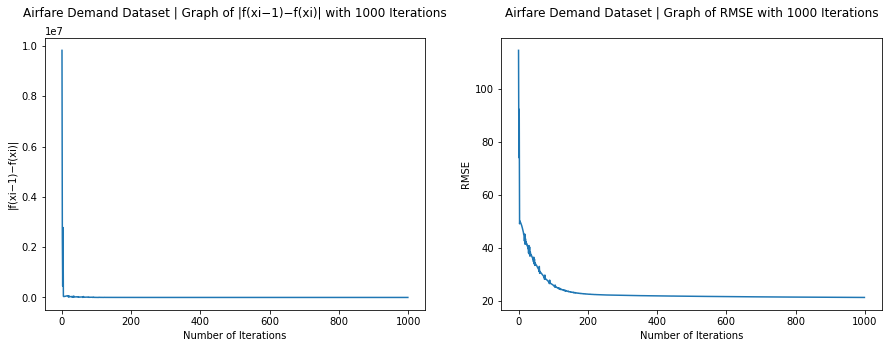

In [40]:
#Calculating new beta using Gradient Descent using imax = 1000
beta = minimize_GD_bolddriver(airfare_Xtrain,airfare_Ytrain,airfare_Xtest,airfare_Ytest,1000)
    
#Plotting the Loss and RMSE with different mu values
plot_stepsize_iteration([i for i in range(1000)],[j for j in range(1000)],loss_difference_values,rmse_values,
          'Airfare Demand Dataset | Graph of |f(xi−1)−f(xi)| with 1000 Iterations\n'.format(i),
          'Airfare Demand Dataset | Graph of RMSE with 1000 Iterations\n'.format(i),
          'Number of Iterations','Number of Iterations','|f(xi−1)−f(xi)|','RMSE')